In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics # for  model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
os.chdir('E:\MLData')

In [3]:
os.listdir()

['2. Linear Regression (1).pdf',
 'bootstrap.html',
 'corr.xlsx',
 'Covid_Data',
 'date.py',
 'DecisionTreeTheory.ipynb',
 'diabetes.csv',
 'DiabeticData.zip',
 'drinks.csv',
 'naiveByesData',
 'nycDataSet',
 'outlier.xlsx',
 'tempCodeRunnerFile.py',
 'WebScraping.html',
 'WebScrapingPyt.py']

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Target Variable:outcome

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Feature Engineering

##### univariate Analysis

In [7]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={'ed':'Count'},inplace=True)
    
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'Percentage'},inplace=True)
    f2['Percentage']=(f2['Percentage']*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)    
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print("value counts and %n ",ff)
#     plt.figure(figsize=(10,8))
#     sns.countplot(data=data,x=x)
#     plt.show()

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
univariate_cat(data=df,x='Outcome')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[1, 0]
value counts and %n     Outcome Percentage
0      500      65.1%
1      268      34.9%


In [10]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

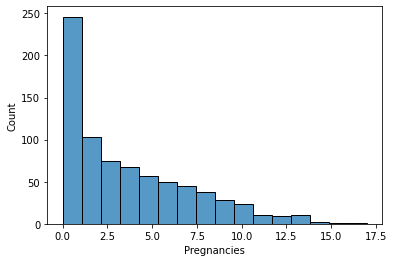

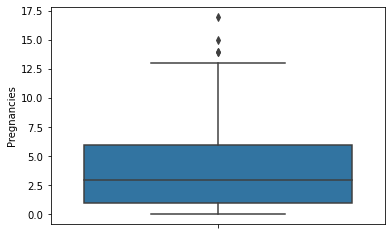

{'missing': 0,
 'min': 0,
 'max': 17,
 'mean': 3.85,
 'var': 11.35,
 'std': 3.37,
 'range': 17,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 6.0,
 'skewness': 0.9,
 'kurtosis': 0.16}

In [12]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='Pregnancies')

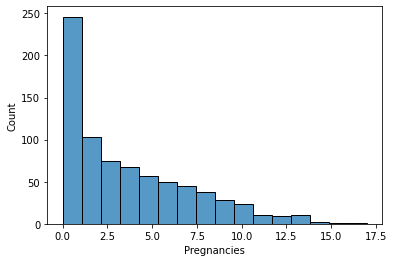

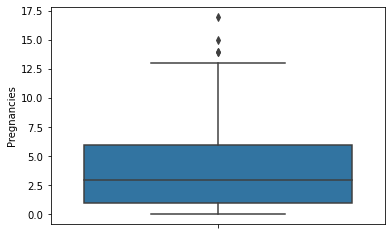

{'missing': 0,
 'min': 0,
 'max': 17,
 'mean': 3.85,
 'var': 11.35,
 'std': 3.37,
 'range': 17,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 6.0,
 'skewness': 0.9,
 'kurtosis': 0.16}

In [102]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='Pregnancies')

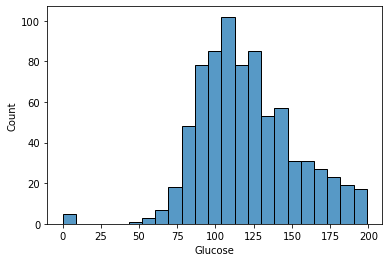

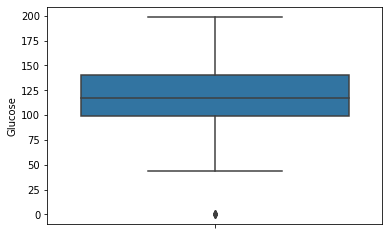

{'missing': 0,
 'min': 0,
 'max': 199,
 'mean': 120.89,
 'var': 1022.25,
 'std': 31.97,
 'range': 199,
 'q1': 99.0,
 'q2': 117.0,
 'q3': 140.25,
 'skewness': 0.17,
 'kurtosis': 0.64}

In [13]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='Glucose')

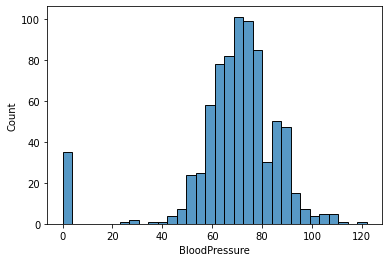

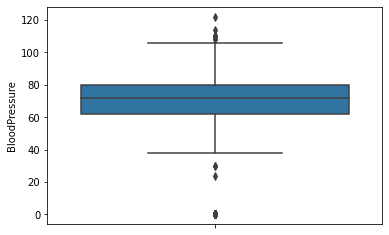

{'missing': 0,
 'min': 0,
 'max': 122,
 'mean': 69.11,
 'var': 374.65,
 'std': 19.36,
 'range': 122,
 'q1': 62.0,
 'q2': 72.0,
 'q3': 80.0,
 'skewness': -1.84,
 'kurtosis': 5.18}

In [104]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='BloodPressure')

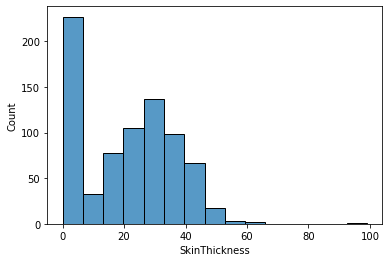

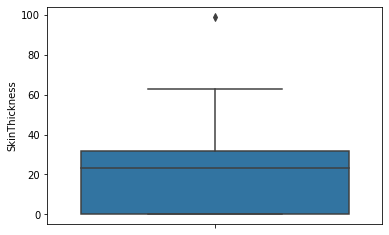

{'missing': 0,
 'min': 0,
 'max': 99,
 'mean': 20.54,
 'var': 254.47,
 'std': 15.95,
 'range': 99,
 'q1': 0.0,
 'q2': 23.0,
 'q3': 32.0,
 'skewness': 0.11,
 'kurtosis': -0.52}

In [105]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='SkinThickness')

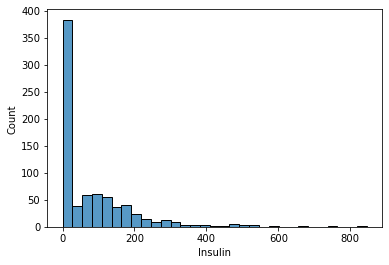

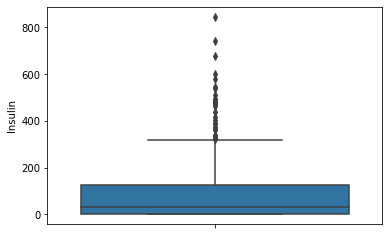

{'missing': 0,
 'min': 0,
 'max': 846,
 'mean': 79.8,
 'var': 13281.18,
 'std': 115.24,
 'range': 846,
 'q1': 0.0,
 'q2': 30.5,
 'q3': 127.25,
 'skewness': 2.27,
 'kurtosis': 7.21}

In [106]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='Insulin')

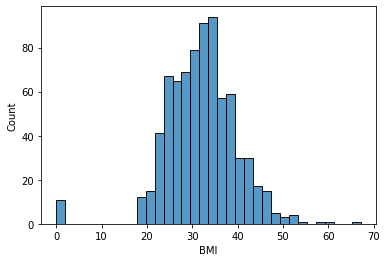

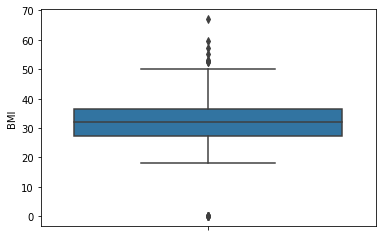

{'missing': 0,
 'min': 0.0,
 'max': 67.1,
 'mean': 31.99,
 'var': 62.16,
 'std': 7.88,
 'range': 67.1,
 'q1': 27.3,
 'q2': 32.0,
 'q3': 36.6,
 'skewness': -0.43,
 'kurtosis': 3.29}

In [107]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='BMI')

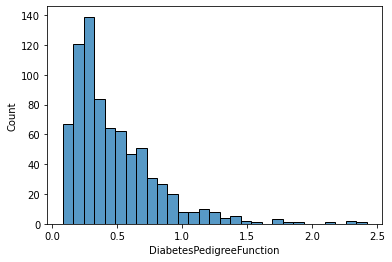

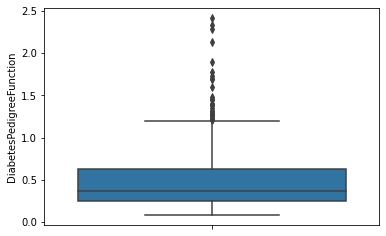

{'missing': 0,
 'min': 0.08,
 'max': 2.42,
 'mean': 0.47,
 'var': 0.11,
 'std': 0.33,
 'range': 2.34,
 'q1': 0.24,
 'q2': 0.37,
 'q3': 0.63,
 'skewness': 1.92,
 'kurtosis': 5.59}

In [108]:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
univariate_num(data=df,x='DiabetesPedigreeFunction')

In [14]:
def outvar='balance'
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap,upper_cap,bank[var])
bank[var]=np.where(bank[var]<=lower_cap,lower_cap,bank[var])

SyntaxError: invalid syntax (2007445899.py, line 1)

In [110]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace({0:np.nan})

In [111]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [55]:
df["Glucose"].fillna("Median",inplace = True)

In [76]:
df["BloodPressure"].fillna("Median",inplace = True)

In [77]:
df["SkinThickness"].fillna("Median",inplace = True)

In [78]:
df["Insulin"].fillna("Median",inplace = True)

In [79]:
df["BMI"].fillna("Median",inplace = True)

In [80]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [67]:
df[['BloodPressure','SkinThickness','Insulin','BMI']].fillna("Median",inplace = True)

C:\Users\sony\AppData\Local\Temp\ipykernel_12492\193616569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['BloodPressure','SkinThickness','Insulin','BMI']].fillna("Median",inplace = True)


In [114]:
from sklearn.impute import SimpleImputer

In [115]:
sm=SimpleImputer(strategy="median") 
df1=sm.fit_transform(df) 
df2=pd.DataFrame(df1, columns=df.columns) 
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [116]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Outliers

In [83]:
def out(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(0.1))
    return x

In [118]:
df3=df2.apply(lambda x:out(x))

In [119]:
y=df3['Outcome']
x=df3.drop(columns=['Outcome'])

#### decision Tree

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [121]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
print('Train Accuracy:',round(dt.score(x_train,y_train),2))
print('Test Accuracy:',round(dt.score(x_test,y_test),2))

Train Accuracy: 1.0
Test Accuracy: 0.74


In [126]:
x_train.shape

(576, 8)

In [130]:
param={'criterion':['gini','entropy'],
      'max_depth':[3,5,7,9,11],
      'min_samples_split':[20,30,50,70,100,120],
      'min_samples_leaf':[1,3,5,7,9,12,15,20]}
dt1=DecisionTreeClassifier()
gd_search=GridSearchCV(estimator=dt1,param_grid=param,cv=5,n_jobs=-1,verbose=1)
gd_search.fit(x_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 12, 15, 20],
                         'min_samples_split': [20, 30, 50, 70, 100, 120]},
             verbose=1)

In [131]:
gd_search.best_score_

0.7413493253373314

In [132]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       min_samples_split=20)

In [139]:
dtf=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=25,
                       min_samples_split=60)
dtf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=25,
                       min_samples_split=60)

In [141]:
print('Train Accuracy:',round(dtf.score(x_train,y_train),2))
print('Test Accuracy:',round(dtf.score(x_test,y_test),2))

Train Accuracy: 0.79
Test Accuracy: 0.77


#### logistic Regression

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,
                                              random_state=0)

In [124]:
logR=LogisticRegression()
logR.fit(x_train,y_train)

C:\Users\sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
print('Train Score:',logR.score(x_train,y_train))
print('Test Score:',logR.score(x_test,y_test))

Train Score: 0.7517361111111112
Test Score: 0.796875


In [144]:
from sklearn import metrics
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)    
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={'Accuracy':ac1,'Recall':rc1,'Precision':pc1,'F1 score':f1,"AUC":auc1}
    
    fpr,tpr,threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

In [143]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [145]:
prob_train_1=logR.predict_proba(x_train)[:,1]
prob_test_1=logR.predict_proba(x_test)[:,1]

In [146]:
prob_train_1

array([0.15214567, 0.23013164, 0.09186375, 0.77812319, 0.77889566,
       0.51730566, 0.08229362, 0.26598987, 0.08527488, 0.17056961,
       0.32094261, 0.32841966, 0.27658547, 0.35504012, 0.23496286,
       0.17066503, 0.40365229, 0.19336077, 0.07167846, 0.09901491,
       0.44986766, 0.32691039, 0.19816706, 0.26827757, 0.7270562 ,
       0.25162669, 0.42587283, 0.1421591 , 0.13460627, 0.06887435,
       0.46707019, 0.50676508, 0.44133781, 0.70139704, 0.30883123,
       0.36092353, 0.07119598, 0.12881092, 0.50348598, 0.42619507,
       0.07604682, 0.30604565, 0.62436127, 0.21358543, 0.14111535,
       0.78493471, 0.13671835, 0.9089518 , 0.37978466, 0.46604678,
       0.23527295, 0.20059749, 0.16718378, 0.45492111, 0.12630073,
       0.87749447, 0.26294841, 0.46473458, 0.31243334, 0.40229859,
       0.04388737, 0.5352259 , 0.40427907, 0.95925519, 0.33832383,
       0.36595829, 0.0870292 , 0.19825553, 0.26757768, 0.0950757 ,
       0.19019878, 0.2716457 , 0.81096468, 0.07802186, 0.36090

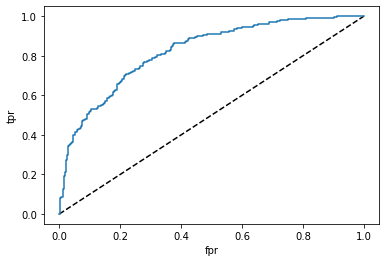

{'Accuracy': 0.7517361111111112,
 'Recall': 0.5436893203883495,
 'Precision': 0.6956521739130435,
 'F1 score': 0.6103542234332425,
 'AUC': 0.7056284439779587}

In [147]:
classification_eva(y_train,pred_train,probs=prob_train_1)

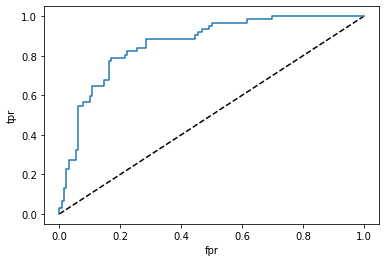

{'Accuracy': 0.796875,
 'Recall': 0.5806451612903226,
 'Precision': 0.7346938775510204,
 'F1 score': 0.6486486486486487,
 'AUC': 0.7403225806451613}

In [148]:
classification_eva(y_test,pred_test,probs=prob_test_1)

In [149]:
prob_train_1=logR.predict_proba(x_train)[:,1]
prob_test_1=logR.predict_proba(x_test)[:,1]

In [154]:
new_pred_train=np.where(prob_train_1>=0.2,1,0)
new_pred_test=np.where(prob_train_1>=0.2,1,0)

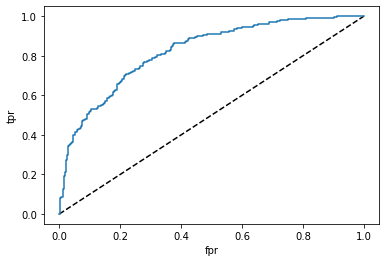

{'Accuracy': 0.6284722222222222,
 'Recall': 0.9174757281553398,
 'Precision': 0.4896373056994819,
 'F1 score': 0.6385135135135136,
 'AUC': 0.6925216478614538}

In [156]:
classification_eva(act=y_train,pred=new_pred_train,probs=prob_train_1)

In [159]:
pd.DataFrame(metrics.confusion_matrix(y_train,new_pred_train),columns=['Pred_0','Pred_1'],index=['Act_0','Act_1'])


,Pred_0,Pred_1
Act_0,173,197
Act_1,17,189
